# Tests

## 1. Iterations tests

Let's consider task of minimization for convex quadratic form on fixed square when there is global solution in this square.

<IPython.core.display.Javascript object>


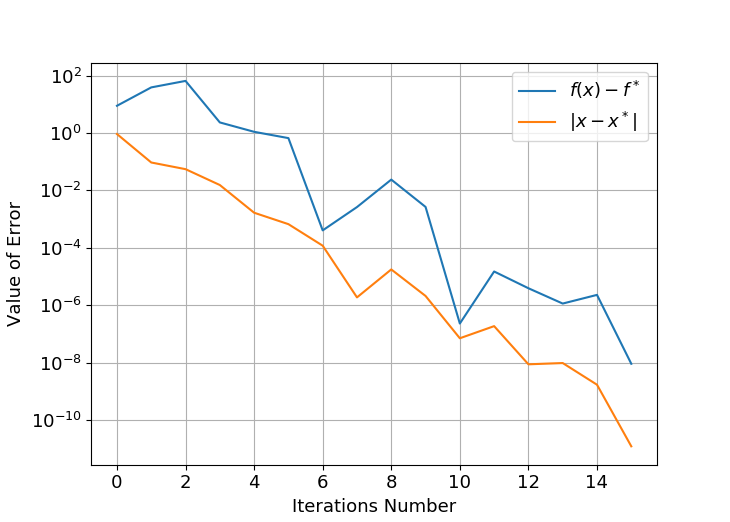

Theoretical Iteration Number through function constant 39.0
Theoretical Iteration Number through gradient constant 19.0


In [2]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import comparison
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
res = comparison.qf_test(1e-8)

Now we consider task of minimization for convex quadratic form on fixed square when there is not global solution in this square.

<IPython.core.display.Javascript object>


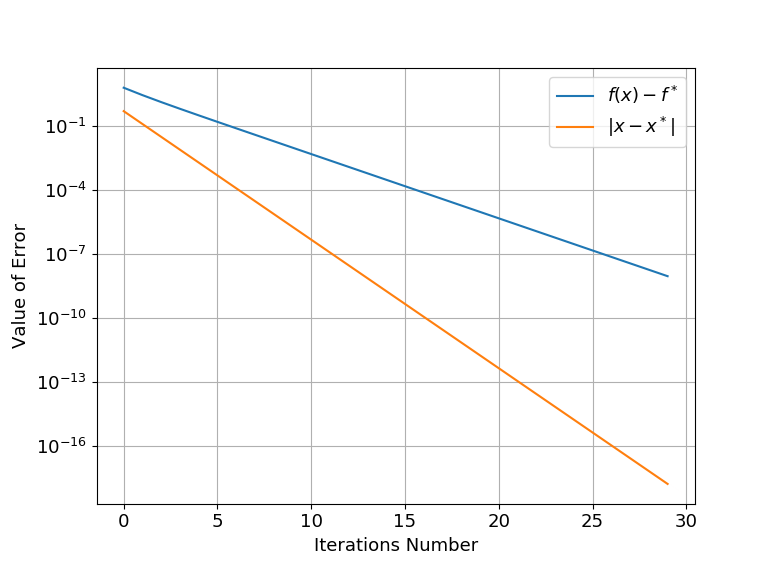

Theoretical Iteration Number through function constant 30.0
Theoretical Iteration Number through gradient constant 14.0


In [2]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import comparison
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
res = comparison.qf_test_2(1e-8)

## 2. Estimates for accuracy of solution on segment

There are three strategies for to stop search of solution on segment. Below $\delta$ is a distance between current point-approximation and accurate solution.

* **The first strategy** - Little big
$$\delta \leq \frac{M_{der}}{L},$$

where $L$ is a Lipschitz constant for *gradient*, $M_{der}$ is a lower bound of derivative with the respect to $y$ for parallel to axis $Ox$ segment and derivative with the respect to $x$ for parallel to axis $Oy$ segment in point solution on segment. For this strategy an estimate is computed on each new segment. This strategy is workable (see theorem 4.1 in [Description of method](https://github.com/ASEDOS999/Optimization-Halving-The-Square/blob/master/One%20method.pdf))

* **The second strategy** - Constant estimate for all segments

$$\delta \leq \frac{\epsilon}{2La\sqrt{5}\log_2\frac{2Ma\sqrt{2}}{\epsilon}},$$

where $L$ and $M$ are Lipschitz constant for *gradient* and *function*, $a$ is a size of square, $\epsilon$ is a required accuracy of initial task's solution. This strategy requires to compute the estimate one time for the one start method. There is proof for this istimate in theorem 1 in [Article of Pasechnyuk and Stonyakin](https://arxiv.org/pdf/1812.10300.pdf).

* **The third strategy** - Comparison with gradient in current point

$$\delta \leq \frac{|f'(\textbf{x}_{cur})|}{L},$$

where $\textbf{x}_{cur}$ is current point-approximation, $L$ is a Lipschitz constant for *gradient*. The $f'(\textbf{x}_{cur})$ is a derivative with the respect to $x$ for parallel to axis $Oy$ segment and is a derivative with the respect to $y$ for parallel to axis $Ox$.

**Important remark**: in the halving square method we use golden search selection as method that solve one-dimensional task.

In [11]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import matplotlib.pyplot as plt
import estimates
%matplotlib notebook

epsilon = [0.1**(i) for i in range(7)]
d = estimates.get_tests_estimates(epsilon)

eps =  1.0e+00
Mean time (True gradient) = 0.71ms
Mean time (Constant estimate) = 1.42ms
Mean time (Current gradient) = 0.74ms
eps =  1.0e-01
Mean time (True gradient) = 1.10ms
Mean time (Constant estimate) = 2.57ms
Mean time (Current gradient) = 1.16ms
eps =  1.0e-02
Mean time (True gradient) = 1.71ms
Mean time (Constant estimate) = 4.53ms
Mean time (Current gradient) = 1.84ms
eps =  1.0e-03
Mean time (True gradient) = 2.43ms
Mean time (Constant estimate) = 7.18ms
Mean time (Current gradient) = 2.63ms
eps =  1.0e-04
Mean time (True gradient) = 3.12ms
Mean time (Constant estimate) = 10.12ms
Mean time (Current gradient) = 3.36ms
eps =  1.0e-05
Mean time (True gradient) = 3.78ms
Mean time (Constant estimate) = 13.57ms
Mean time (Current gradient) = 4.12ms
eps =  1.0e-06
Mean time (True gradient) = 4.94ms
Mean time (Constant estimate) = 19.16ms
Mean time (Current gradient) = 5.37ms


<IPython.core.display.Javascript object>


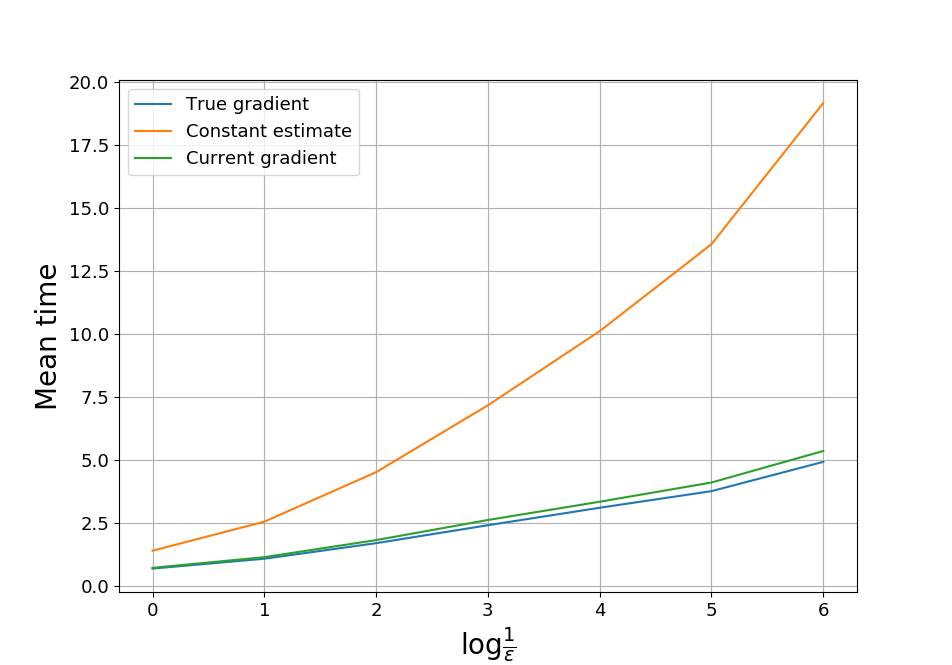

In [16]:
import matplotlib.pyplot as plt
%matplotlib notebook
cur = dict()
keys = list(d.keys())
keys.sort()
for i in keys:
    for j in d[i]:
        if cur.__contains__(j):
            cur[j].append(d[i][j])
        else:
            cur[j] = [d[i][j]]
k = cur.keys()
import numpy as np
keys = [-np.log(i)/np.log(10) for i in keys]
for j in k:
    plt.plot(keys, cur[j])
plt.grid()
n = 13
plt.xticks(fontsize = n)
plt.yticks(fontsize = n)
plt.legend(k, fontsize = n)
n = 20
plt.xlabel(r'$\log\frac{1}{\epsilon}$', fontsize = n)
plt.ylabel('Mean time', fontsize = n)
plt.savefig('1.pdf')

## 3. Comparison for LogSumExp N = 10

In [4]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import matplotlib.pyplot as plt
import comparison
%matplotlib notebook
import time

N = 10
time_max = 40
s=time.time()
results, f = comparison.NEWcomparison_LogSumExp(N, time_max = time_max)
results_copy1 = results, f
time.time()-s

R0 0.3637344256502004
L_f 100.66976153931256
Ellipsoids
CurGrad
ConstEst
GD


40.62891626358032

In [5]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys = list(results.keys())
#keys = ["HalvingSquare-Const", 'Ellipsoids']
new_dict = dict()
for key in keys:
    print(key, len(results[key][3]))
    times = [i - results[key][3][0] for i in results[key][3]]
    f_value = [f.calculate_function(i[0], i[1]) for i in results[key][2]]
    new_dict[key] = (times, f_value)

HalvingSquare-CurGrad 20
Ellipsoids 134
GD 142
HalvingSquare-ConstEst 20


<IPython.core.display.Javascript object>


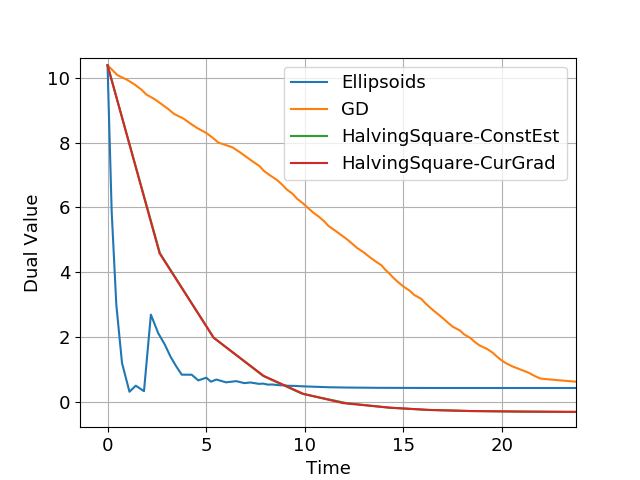

In [6]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys.sort()
for i in keys:
    plt.plot(new_dict[i][0], new_dict[i][1])

plt.grid()
n = 13
plt.xticks(fontsize = n)
plt.yticks(fontsize = n)
plt.legend(keys, fontsize = n)
n = 13
plt.ylabel('Dual Value', fontsize = n)
plt.xlabel('Time', fontsize = n)
plt.show()

## 4.  Comparison For LogSumExp N = 100

In [7]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import matplotlib.pyplot as plt
import comparison
%matplotlib notebook

N = 100
time_max = 1000
import time
s = time.time()
results, f = comparison.NEWcomparison_LogSumExp(N, time_max = time_max)
results_copy1 = results, f
time.time()-s

R0 0.7469923071385993
L_f 102.64583789451642
Ellipsoids
CurGrad
ConstEst
GD


1066.3127653598785

In [8]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys = list(results.keys())
#keys = ["HalvingSquare-Const", 'Ellipsoids']
new_dict = dict()
for key in keys:
    print(key, len(results[key][3]))
    times = [i - results[key][3][0] for i in results[key][3]]
    f_value = [f.calculate_function(i[0], i[1]) for i in results[key][2]]
    new_dict[key] = (times, f_value)

HalvingSquare-CurGrad 7
GD 29
Ellipsoids 33
HalvingSquare-ConstEst 7


<IPython.core.display.Javascript object>


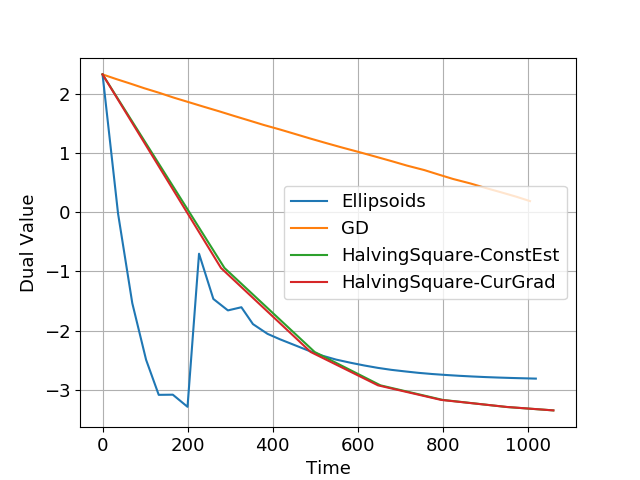

In [9]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys.sort()
for i in keys:
    plt.plot(new_dict[i][0], new_dict[i][1])

plt.grid()
n = 13
plt.xticks(fontsize = n)
plt.yticks(fontsize = n)
plt.legend(keys, fontsize = n)
plt.ylabel('Dual Value', fontsize = n)
plt.xlabel('Time', fontsize = n)
plt.show()

## 5. Comparison For LogSumExp  N = 1000

In [23]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import matplotlib.pyplot as plt
import comparison
%matplotlib notebook

N = 1000
time_max = 5000
import time
s = time.time()
results, f = comparison.NEWcomparison_LogSumExp(N, time_max = time_max)
results_copy1 = results, f
time.time()-s

R0 0.5448864144215536
L_f 101.70996324269423
Ellipsoids
CurGrad
ConstEst
GD


8382.67668581009

In [26]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys = list(results.keys())
#keys = ["HalvingSquare-Const", 'Ellipsoids']
new_dict = dict()
for key in keys:
    print(key, len(results[key][3]))
    times = [i - results[key][3][0] for i in results[key][3]]
    f_value = [f.calculate_function(i[0], i[1]) for i in results[key][2]]
    new_dict[key] = (times, f_value)

HalvingSquare-CurGrad 2
GD 4
Ellipsoids 5
HalvingSquare-ConstEst 2


<IPython.core.display.Javascript object>


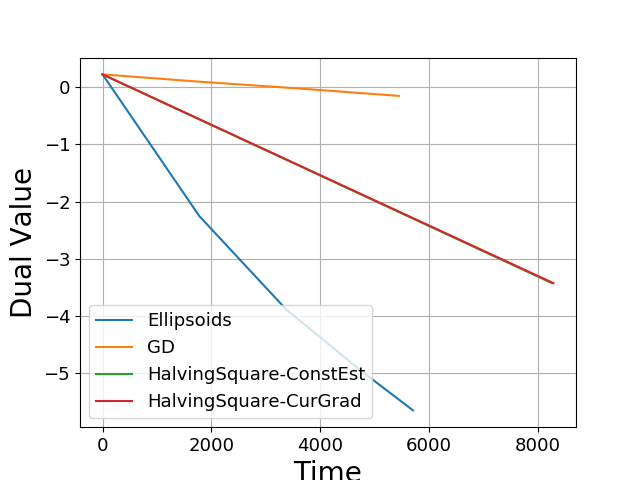

In [28]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys.sort()
for i in keys:
    plt.plot(new_dict[i][0], new_dict[i][1])

plt.grid()
n = 13
plt.xticks(fontsize = n)
plt.yticks(fontsize = n)
plt.legend(keys, fontsize = n)
n = 20
plt.ylabel('Dual Value', fontsize = n)
plt.xlabel('Time', fontsize = n)
plt.show()

## 5. Comparison For LogSumExp  N = 10000

In [23]:
import sys
sys.path.append("./Experiments")
sys.path.append("./Tests_functions")
import matplotlib.pyplot as plt
import comparison
%matplotlib notebook

N = 1000
time_max = 5000
import time
s = time.time()
results, f = comparison.NEWcomparison_LogSumExp(N, time_max = time_max)
results_copy1 = results, f
time.time()-s

R0 0.5448864144215536
L_f 101.70996324269423
Ellipsoids
CurGrad
ConstEst
GD


8382.67668581009

In [24]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys = list(results.keys())
#keys = ["HalvingSquare-Const", 'Ellipsoids']
new_dict = dict()
for key in keys:
    print(key, len(results[key][3]))
    times = [i - results[key][3][0] for i in results[key][3]]
    f_value = [f.calculate_function(i[0], i[1]) for i in results[key][2]]
    new_dict[key] = (times, f_value)

HalvingSquare-CurGrad 2
GD 4
Ellipsoids 5
HalvingSquare-ConstEst 2


<IPython.core.display.Javascript object>


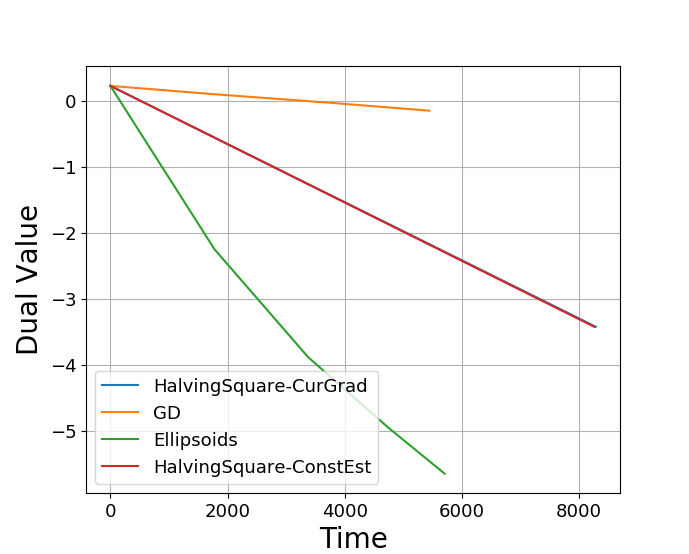

In [25]:
import matplotlib.pyplot as plt
%matplotlib notebook
keys.sort()
for i in keys:
    plt.plot(new_dict[i][0], new_dict[i][1])

plt.grid()
n = 13
plt.xticks(fontsize = n)
plt.yticks(fontsize = n)
plt.legend(keys, fontsize = n)
n = 20
plt.ylabel('Dual Value', fontsize = n)
plt.xlabel('Time', fontsize = n)
plt.show()